### Importing the libaries

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

### Load the dataset

In [2]:
data=pd.read_csv('loan_prediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

### Uni-Variate Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

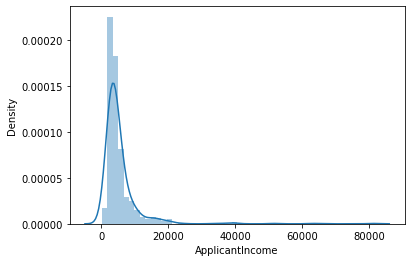

In [6]:
sns.distplot(data.ApplicantIncome)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

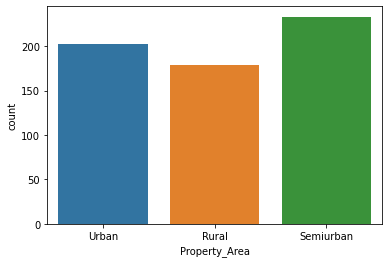

In [7]:
sns.countplot(data.Property_Area)

<AxesSubplot:xlabel='Gender', ylabel='count'>

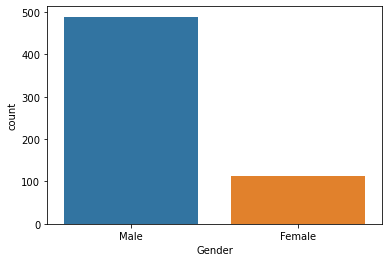

In [8]:
sns.countplot(data.Gender)

<AxesSubplot:xlabel='Education', ylabel='count'>

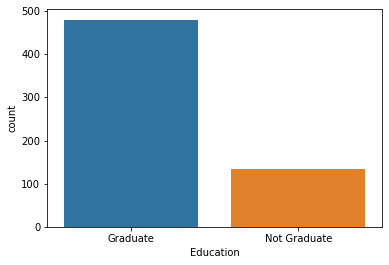

In [9]:
sns.countplot(data.Education)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

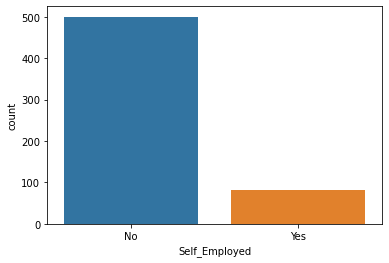

In [10]:
sns.countplot(data.Self_Employed)

<AxesSubplot:xlabel='Married', ylabel='count'>

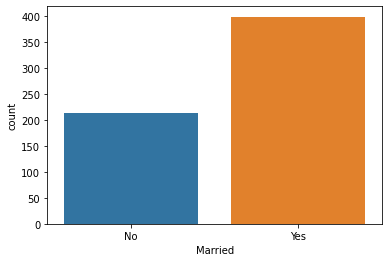

In [11]:
sns.countplot(data.Married)

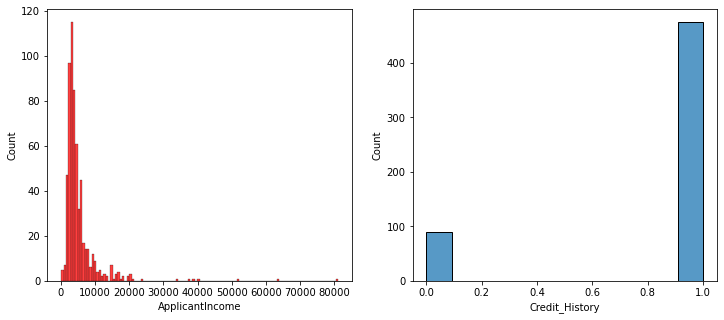

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.histplot(data['Credit_History'])
plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='Married', ylabel='count'>

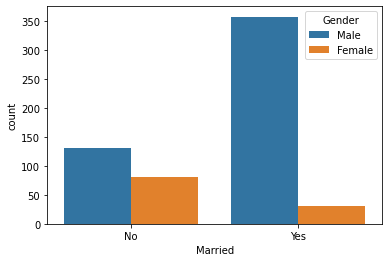

In [13]:
sns.countplot(data['Married'],hue=data['Gender'])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

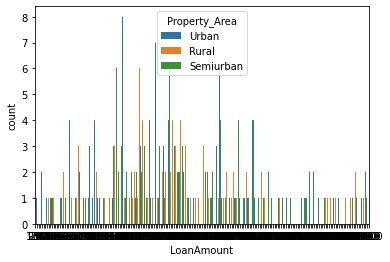

In [14]:
sns.countplot(data['LoanAmount'],hue=data['Property_Area'])

<AxesSubplot:xlabel='Education', ylabel='count'>

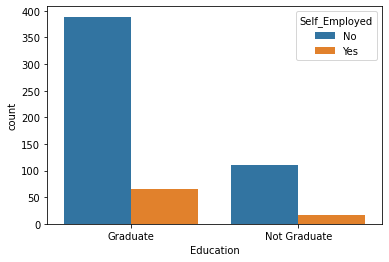

In [15]:
sns.countplot(data['Education'],hue=data['Self_Employed'])

In [ ]:
sns.barplot(data.ApplicantIncome,data.CoapplicantIncome)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

In [ ]:
plt.scatter(data.ApplicantIncome,data.LoanAmount)

In [ ]:
sns.countplot(data['Dependents'],hue=data['Gender'])

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])

### Multivariate Analysis

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
plt.plot(data.LoanAmount,data.ApplicantIncome,data.CoapplicantIncome)

In [ ]:
data.plot.line()

In [ ]:
data.hist()

In [ ]:
sns.swarmplot(data['Gender'],data['ApplicantIncome'], hue=data['Loan_Status'])

### Descriptive Analysis

In [ ]:
data.describe()

### Checking For Null Values

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

### Handling Categorical Values

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Married'] = le.fit_transform(data['Married'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Education'] = le.fit_transform(data['Education'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [ ]:
data.head()

In [ ]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

In [ ]:
data.info()

## Balancing The Dataset

In [ ]:
from imblearn.combine import SMOTETomek


In [ ]:
smote=SMOTETomek(0.95)

In [ ]:
y=data['Loan_Status']
x=data.drop(columns=["Loan_ID",'Loan_Status'],axis=1)
x_bal,y_bal=smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

## Scaling The Data

In [ ]:
sc=StandardScaler()
x_bal_scaled=sc.fit_transform(x_bal)
x_bal_scaled = pd.DataFrame(x_bal,columns=x.columns)
x_bal_scaled

In [ ]:
# processed Data
df=pd.concat([x_bal_scaled,y_bal],axis=1)
df


### saving into  train test datasets

In [ ]:
train,test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
train.to_csv('train.csv',encoding='utf-8',index=False)
test.to_csv('test.csv',encoding='utf-8',index=False)

## Splitting the data

In [ ]:
x=df.drop(["Loan_Status"],axis=1)
x

In [ ]:
y=df.Loan_Status
y

##  Splitting Data Into Train And Test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)